Project Description:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Attribute Information:
    Independent Variables:
1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3.	Married - This refers to applicant being in a state of matrimony
4.	Dependents - This refres to persons who depends on the applicants for survival
5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.


You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset.

Steps to Follow for the Project: The dataset contains 13 features and 614 samples
Below are the steps to follow for the project:

Import the required libraries and data.
Do the careful EDA analysis, preprocessing and feature engineering on the given data.
Build/Test multiple models on the same dataset.
Check underfitting/overfitting,  avoid underfitting or overfitting (bias/variance) , cross validation and all performance parameters(metrics) for all models depending on the problem type.
Try to achieve a model with good performance.
Select the best/final performing model and explain on what basis you have selected the particular model as a final model.
Do hyper parameter tuning on the final/best model or on all models.
Save the best model for production and convey on which basis you have chosen that model.
Make the documentation and write your findings in the same file i.e. ipynb

# Importing required Libraries

In [83]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import utils
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import datasets,linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import warnings 
warnings.filterwarnings('ignore')
# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
import joblib
from sklearn.model_selection import cross_validate,KFold,cross_val_score
from sklearn.metrics import  roc_curve, roc_auc_score
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier)
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,ExtraTreesRegressor,AdaBoostRegressor,GradientBoostingRegressor


In [84]:
# Loading the dataset downloaded from kaggle
loan_dt=pd.read_csv('loan_prediction.csv')
loan_dt.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [85]:
loan_dt.shape # to determine the shape of the dataset

(614, 13)

In [86]:
loan_dt['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

# Data Cleaning and Transfroming (Exploratory Data Analysis)

In [87]:
# Checking for null values
loan_dt.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [88]:
# Imputating Missing value with mode for categorical features
loan_dt['Credit_History'].fillna(loan_dt['Credit_History'].mode()[0],inplace=True)
loan_dt['Self_Employed'].fillna(loan_dt['Self_Employed'].mode()[0],inplace=True)
loan_dt['Dependents'].fillna(loan_dt['Dependents'].mode()[0], inplace=True)
loan_dt['Gender'].fillna(loan_dt['Gender'].mode()[0],inplace=True)
loan_dt['Married'].fillna(loan_dt['Married'].mode()[0],inplace=True)

# Imputation of Numerical features
loan_dt['Loan_Amount_Term'].fillna(loan_dt['Loan_Amount_Term'].mode()[0],inplace=True)
loan_dt['LoanAmount'].fillna(loan_dt['LoanAmount'].median(), inplace=True)

<AxesSubplot:>

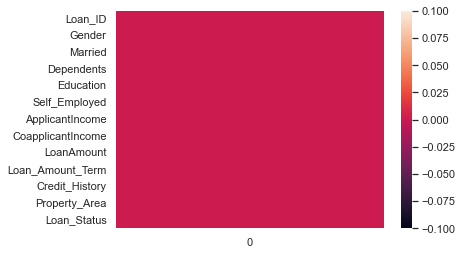

In [89]:
# Using Heat map to check for null values
sns.heatmap(loan_dt.isnull().sum().to_frame())

In [90]:
loan_dt['Gender'].unique()

array(['Male', 'Female'], dtype=object)

# Converting Categorical Variable to Numerical

In [91]:
loan_dt['Gender'] = loan_dt['Gender'].apply(lambda row: 1 if row == 'Male' else 0)

In [92]:
loan_dt['Married'] = loan_dt['Married'].apply(lambda row: 1 if row == 'Yes' else 0)

In [93]:
loan_dt['Education'] = loan_dt['Education'].apply(lambda row: 1 if row == 'Graduate' else 0)

In [94]:
loan_dt['Self_Employed'] = loan_dt['Self_Employed'].apply(lambda row: 1 if row == 'Yes' else 0)

In [95]:
loan_dt['Loan_Status'] = loan_dt['Loan_Status'].apply(lambda row: 1 if row == 'Y' else 0)

In [96]:
# ConvertingJobRole to Integer
emb_d = {'Urban':0, 'Rural':1, 'Semiurban':2}
loan_dt['Property_Area'] = loan_dt['Property_Area'].map(emb_d)

In [97]:
loan_dt.tail(15)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
599,LP002948,1,1,2,1,0,5780,0.0,192.0,360.0,1.0,0,1
600,LP002949,0,0,3+,1,0,416,41667.0,350.0,180.0,1.0,0,0
601,LP002950,1,1,0,0,0,2894,2792.0,155.0,360.0,1.0,1,1
602,LP002953,1,1,3+,1,0,5703,0.0,128.0,360.0,1.0,0,1
603,LP002958,1,0,0,1,0,3676,4301.0,172.0,360.0,1.0,1,1
604,LP002959,0,1,1,1,0,12000,0.0,496.0,360.0,1.0,2,1
605,LP002960,1,1,0,0,0,2400,3800.0,128.0,180.0,1.0,0,0
606,LP002961,1,1,1,1,0,3400,2500.0,173.0,360.0,1.0,2,1
607,LP002964,1,1,2,0,0,3987,1411.0,157.0,360.0,1.0,1,1
608,LP002974,1,1,0,1,0,3232,1950.0,108.0,360.0,1.0,1,1


In [98]:
loan_dt.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.781759,0.133550,5403.459283,1621.245798,145.752443,342.410423,0.855049,1.050489,0.687296
std,0.386497,0.476373,0.413389,0.340446,6109.041673,2926.248369,84.107233,64.428629,0.352339,0.840875,0.463973
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [99]:
loan_dt['Gender'].unique()

array([1, 0], dtype=int64)

# Univarite Analysis

In [100]:
# Determine the unique values for each region
loan_status = loan_dt["Loan_Status"].value_counts()
loan_status

1    422
0    192
Name: Loan_Status, dtype: int64

                           Target Variable Distribution                          


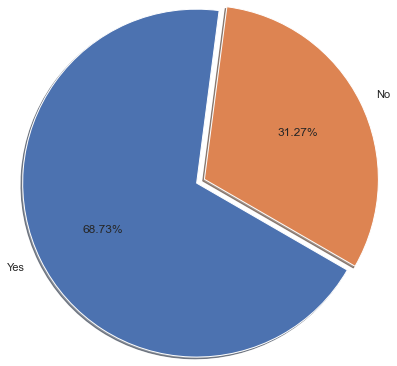

In [101]:
labels = ['Yes','No']
explode=np.zeros(len(labels))
explode[-1]=0.1
# Representing the pie chart using Pie Chart
print('\033[1mTarget Variable Distribution'.center(85))
plt.pie(loan_dt["Loan_Status"].value_counts(), labels=labels, counterclock=False, shadow=True,explode=explode, autopct='%1.2f%%', radius=2, startangle=-30)
plt.show()

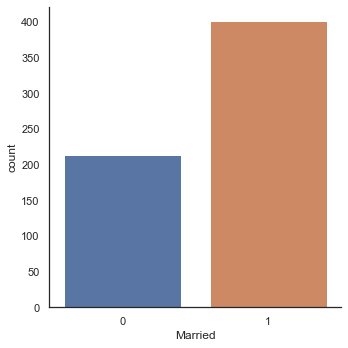

In [102]:
#Analysis of Marital Status
sns.set(style="white")
sns.catplot(x = 'Married', data =loan_dt , kind = 'count',margin_titles =False,label=labels)

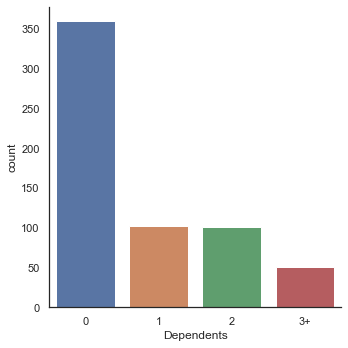

In [103]:
#Analysis of Dependents
sns.set(style="white")
sns.catplot(x = 'Dependents', data =loan_dt , kind = 'count',margin_titles =False,label=labels)

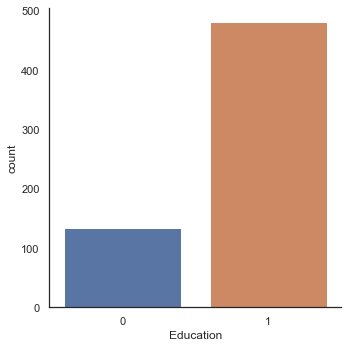

In [104]:
#Analysis of Education
sns.set(style="white")
sns.catplot(x = 'Education', data =loan_dt , kind = 'count',margin_titles =False,label=labels)

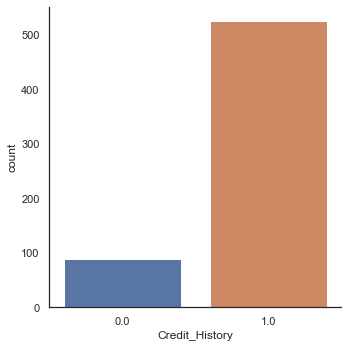

In [105]:
#Analysis of Credit_History
sns.set(style="white")
sns.catplot(x = 'Credit_History', data =loan_dt , kind = 'count',margin_titles =False,label=labels)

# Bivarite Analysis

In [106]:
# function to Visualizing Categorical values using Box plot
def features_plot(Categorical_column):
    plt.figure(figsize=(10,10))
    plt.subplot(2,1,1)
    col_name=[ 'Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']
    sns.countplot(x=Categorical_column,hue='Loan_Status', data=loan_dt)
    plt.title(f"{Categorical_column.title()} vs Loan_Status",fontweight="black",size=25,pad=10,)
    plt.legend(title='subscribed', loc='upper right', labels=['No', 'Yes'])
    col_values = loan_dt[Categorical_column].value_counts()
    plt.tight_layout()

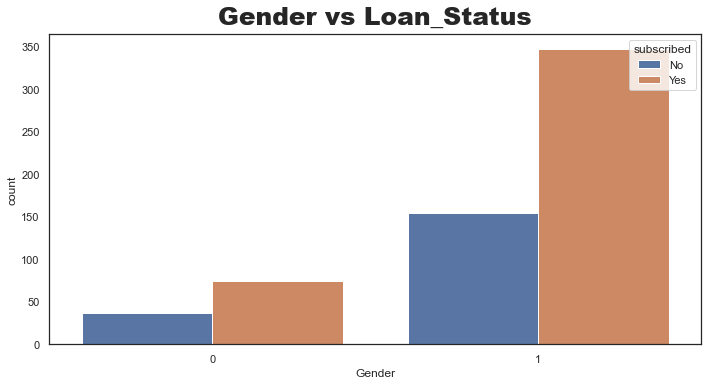

In [107]:
features_plot('Gender')
# 'Male':0,'Female':1

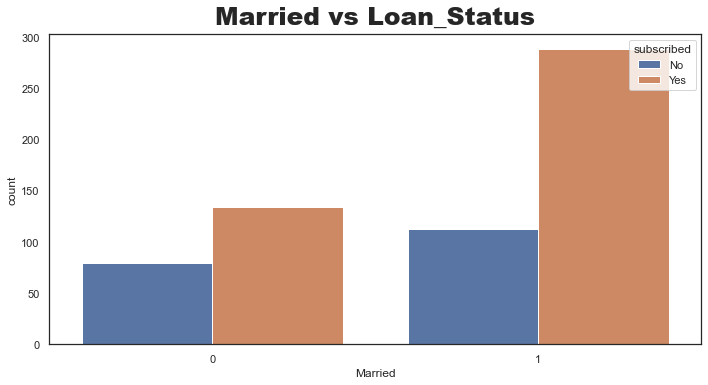

In [109]:
features_plot('Married')

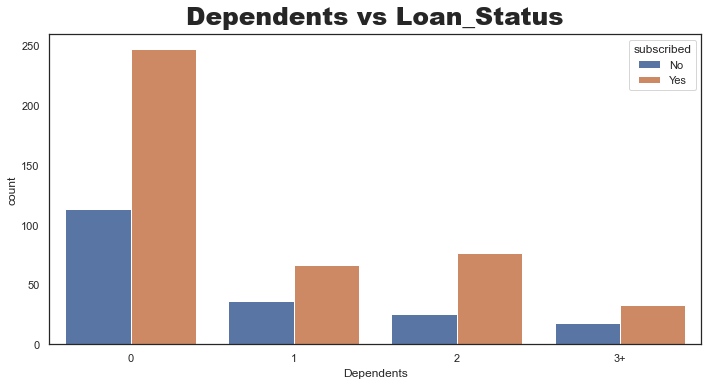

In [110]:
features_plot('Dependents')

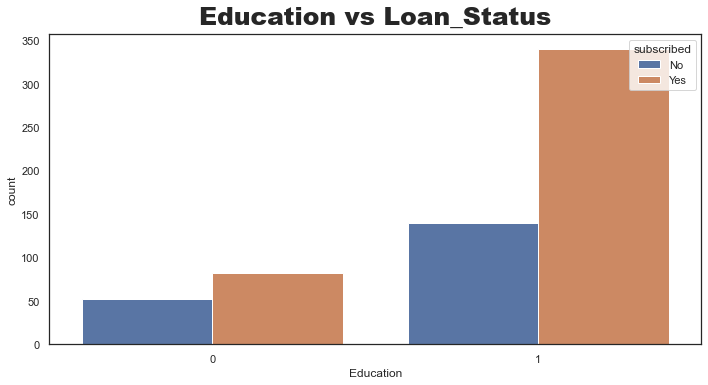

In [111]:
features_plot('Education')

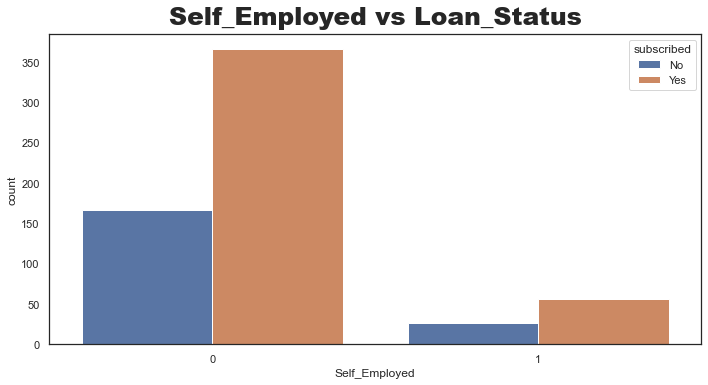

In [112]:
features_plot('Self_Employed')

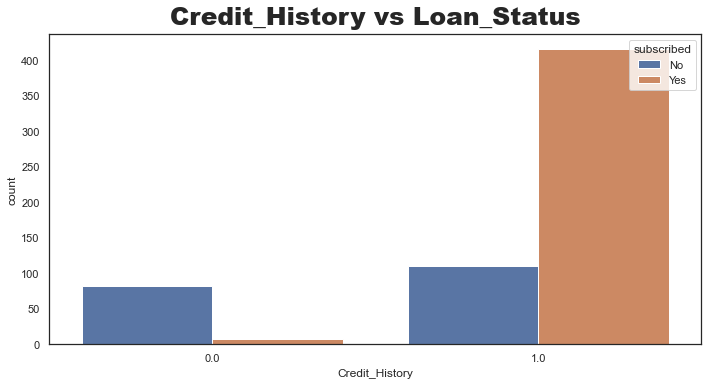

In [113]:
features_plot('Credit_History')

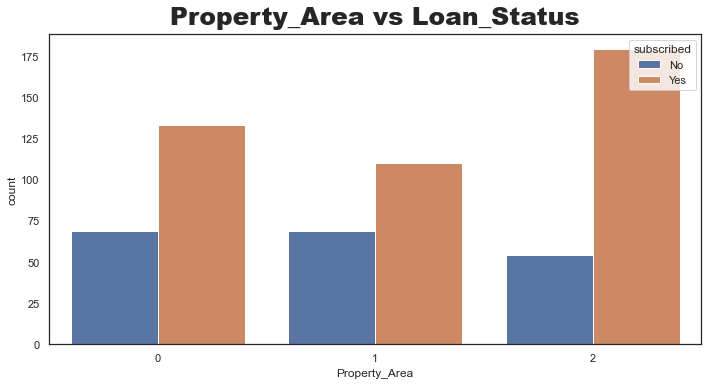

In [31]:
features_plot('Property_Area')

# Multivarite Analysis

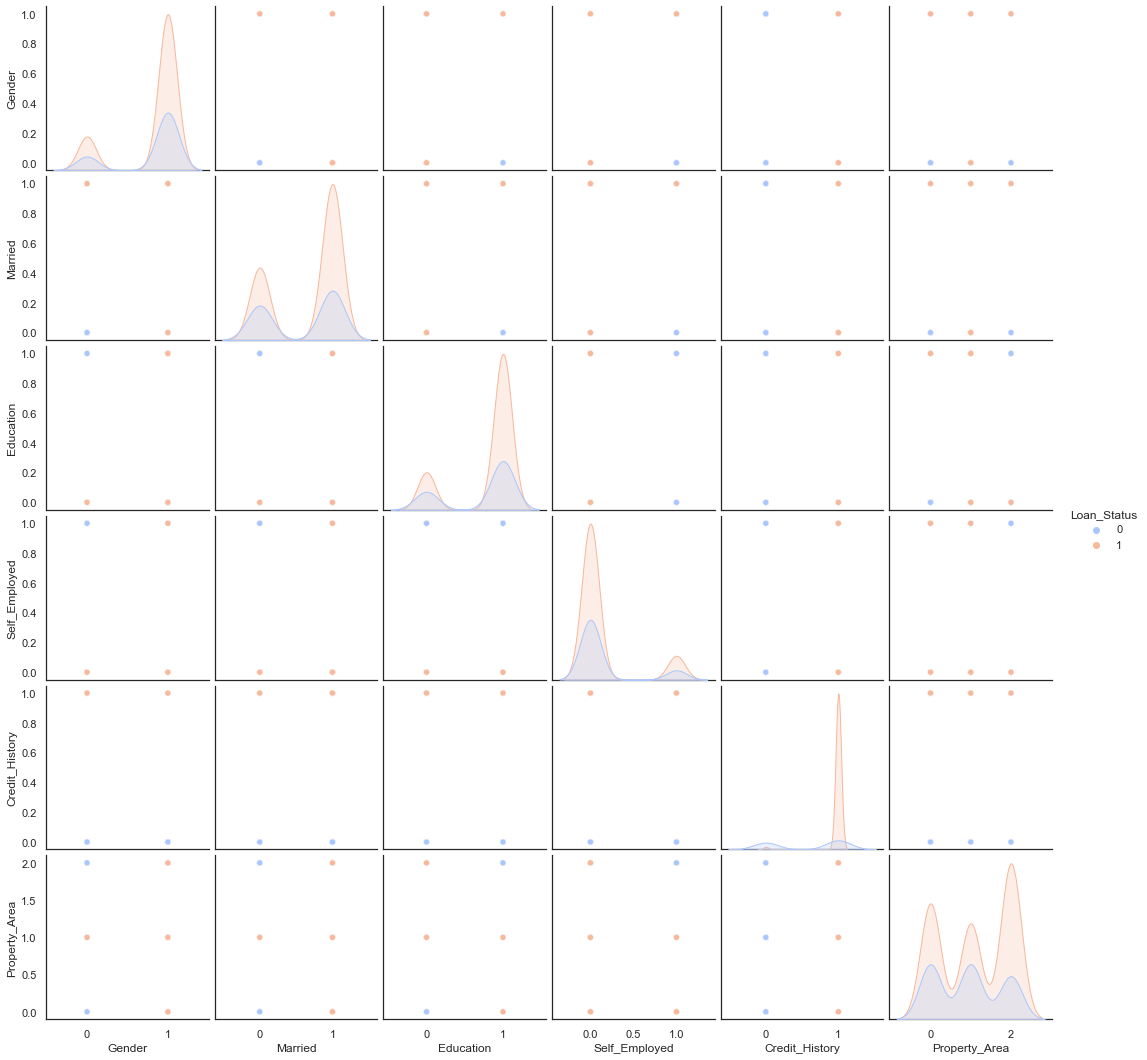

In [114]:
sns.pairplot(loan_dt, vars=['Gender','Married','Education','Self_Employed','Credit_History','Property_Area'],hue='Loan_Status',palette="coolwarm")
plt.show()

# Feature Selection/Extraction- to identify the most relevant features

<AxesSubplot:>

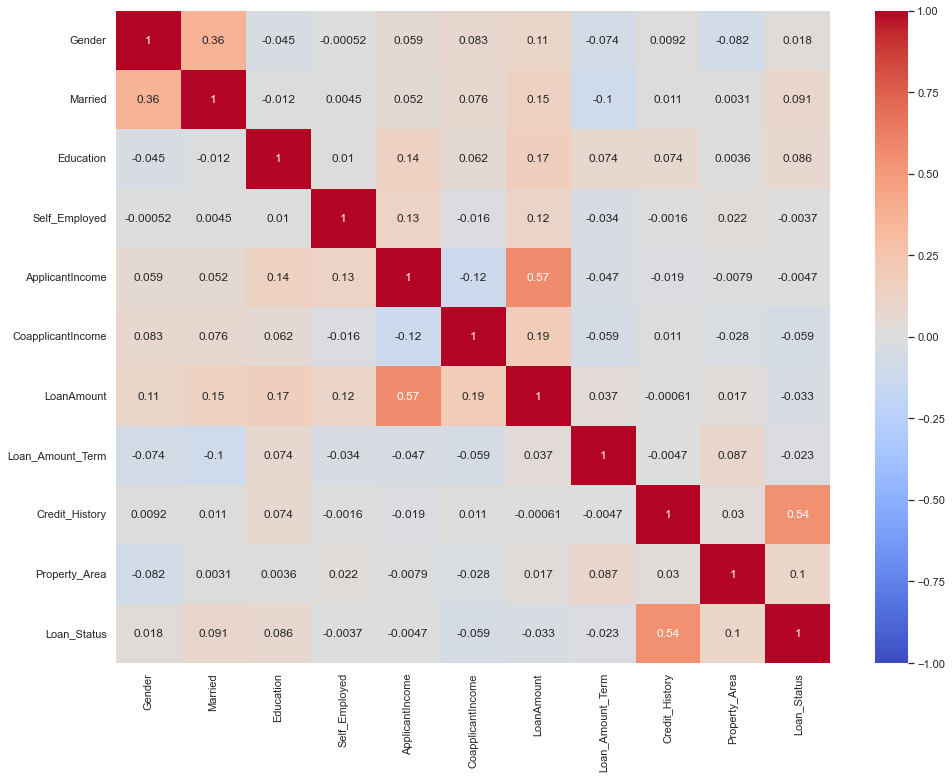

In [116]:
# Having a look at the correlation matrix
plt.figure(figsize=(16,12))
mask = np.zeros_like(loan_dt.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=loan_dt.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

In [118]:
# Checking for Outliers
# Checking for skewness of the data to determine outliers
loan_dt.skew()

Gender              -1.648795
Married             -0.644850
Education           -1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.095601
Loan_Status         -0.809998
dtype: float64

In [119]:
from sklearn.preprocessing import power_transform # using power Transformation method to remove outliers 
loan_dt[['ApplicantIncome','CoapplicantIncome']]=power_transform(loan_dt[['ApplicantIncome','CoapplicantIncome']],method='yeo-johnson')

In [120]:
# Checking for skewness of the data after transformatio
loan_dt.skew()

Gender              -1.648795
Married             -0.644850
Education           -1.367622
Self_Employed        2.159796
ApplicantIncome     -0.092946
CoapplicantIncome   -0.145646
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.095601
Loan_Status         -0.809998
dtype: float64

# Data Preprocessing

In [121]:
# Separating feature data and Label data
X = loan_dt.drop(['Loan_Status','Loan_ID','Dependents'],axis=1)
y= loan_dt['Loan_Status']

In [122]:
# Standardizing the dataset for X
from sklearn.preprocessing import StandardScaler
stdscalar= StandardScaler()
X_Scalar= stdscalar.fit_transform(X)

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X_Scalar, y, test_size = 0.20,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((491, 10), (123, 10), (491,), (123,))

# Build/Test multiple models

In [124]:
#Using Logistic Regression to  train a logistic regression model on the training set
lreg = LogisticRegression()
lreg.fit(X_train, y_train)
# Predicting the data model
lreg_pred = lreg.predict(X_test) # Predicting the model
lreg_pred.shape

(123,)

In [125]:
#Accuracy and various Metrics for the model
LR_testing=round(lreg.score(X_train, y_train)*100,2)
LR_mae=mean_absolute_error(lreg_pred,y_test)
LR_mse=mean_squared_error(lreg_pred,y_test)
LR_rmse=np.sqrt(mean_squared_error(lreg_pred,y_test))
LR_r2=r2_score(y_test,lreg_pred)*100
print('Mean absolute error  =>',LR_mae)
print('Mean squared error  =>',LR_mse)
print('Root Mean squared error  =>',LR_rmse)
print('R2 Score  =>',LR_r2)
print("Accuracy Score of Testing Data is =>",LR_testing)

Mean absolute error  => 0.21138211382113822
Mean squared error  => 0.21138211382113822
Root Mean squared error  => 0.4597631061983315
R2 Score  => 7.03488372093023
Accuracy Score of Testing Data is => 81.47


In [126]:
# Create instances of all four classifier- Using other models
rfc=RandomForestClassifier()
et =ExtraTreesClassifier() 
bmc = BaggingClassifier() 
abc = AdaBoostClassifier()
gbc=GradientBoostingClassifier()
rft=RandomForestClassifier()



 Error of  RandomForestClassifier() :
Mean absolute error : 0.21138211382113822
Mean squared error : 0.21138211382113822
Root Mean Squared Error: 0.4597631061983315


 R2 Score :
78.86178861788618




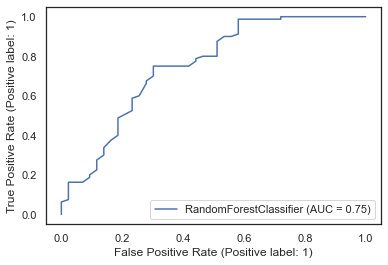



 Error of  ExtraTreesClassifier() :
Mean absolute error : 0.21138211382113822
Mean squared error : 0.21138211382113822
Root Mean Squared Error: 0.4597631061983315


 R2 Score :
78.86178861788618




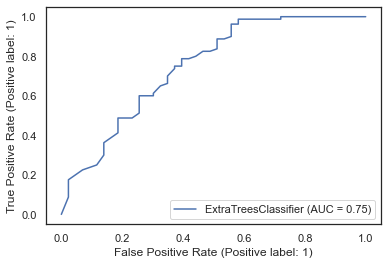



 Error of  BaggingClassifier() :
Mean absolute error : 0.21138211382113822
Mean squared error : 0.21138211382113822
Root Mean Squared Error: 0.4597631061983315


 R2 Score :
78.86178861788618




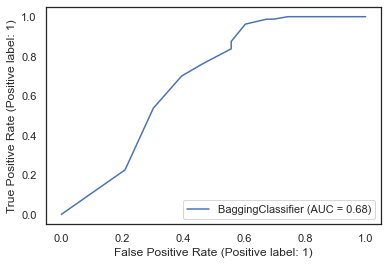



 Error of  AdaBoostClassifier() :
Mean absolute error : 0.21138211382113822
Mean squared error : 0.21138211382113822
Root Mean Squared Error: 0.4597631061983315


 R2 Score :
78.86178861788618




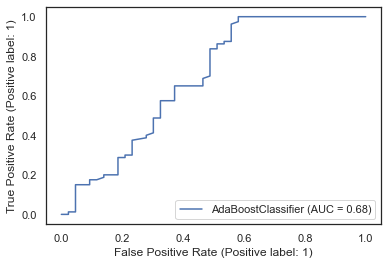



 Error of  GradientBoostingClassifier() :
Mean absolute error : 0.21138211382113822
Mean squared error : 0.21138211382113822
Root Mean Squared Error: 0.4597631061983315


 R2 Score :
78.86178861788618




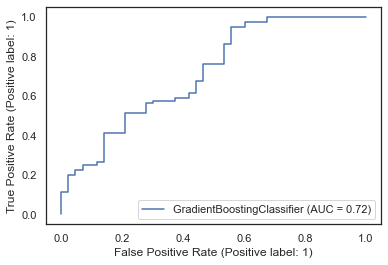



 Error of  RandomForestClassifier() :
Mean absolute error : 0.21138211382113822
Mean squared error : 0.21138211382113822
Root Mean Squared Error: 0.4597631061983315


 R2 Score :
78.86178861788618




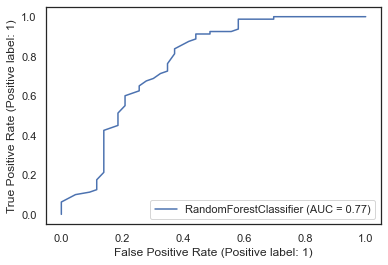

In [127]:
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay
#Train the model using the training sets y_pred=clf.predict(X_test), prediction on test set
for clf in (rfc, et, bmc, abc,gbc,rft):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('\n')                                        
    print(' Error of ', clf, ':' )
    print('Mean absolute error :', mean_absolute_error(y_test,lreg_pred))
    print('Mean squared error :', mean_squared_error(y_test,lreg_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,lreg_pred)))
    print('\n')

    print(' R2 Score :')
    #print(r2_score(y_test,y_pred)*100) 
    print(accuracy_score(y_test,lreg_pred)*100)
    print('\n')
    display = RocCurveDisplay.from_estimator(clf,X_test,y_test)   
    plt.legend(prop={'size':11}, loc='lower right')
    plt.show()
    #print('=============================================================================================================='))

# Cross Validation for the Models

In [128]:
from sklearn.model_selection import cross_val_score

np.random.seed(10)
def rmse_cv(model, X_Scalar,y):
    rmse =(cross_val_score(model, X_Scalar,y, cv=6))
    return(rmse)



models = [RandomForestClassifier(),
         ExtraTreesClassifier(),
         BaggingClassifier(),
         AdaBoostClassifier(),
         GradientBoostingClassifier(),
         RandomForestClassifier(), ]
          
          
names = [rfc, et, bmc, abc,gbc,rft]
          
for model,name in zip(models,names):
          score = rmse_cv(model,X,y)
          print("{}  : {:.4f}, {:4f}".format(name,score.mean()*100,score.std()*100))

RandomForestClassifier()  : 78.5012, 3.278447
ExtraTreesClassifier()  : 77.0353, 1.677194
BaggingClassifier()  : 76.8640, 4.336854
AdaBoostClassifier()  : 78.9898, 1.672957
GradientBoostingClassifier()  : 77.8476, 2.395087
RandomForestClassifier()  : 78.8296, 3.206831


# Hyperparameter tuning for Random Foresrt Classifier

In [129]:
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

In [130]:
grid_search = GridSearchCV(RandomForestClassifier(),param_grid=param_grid)
grid_search.fit(X_train, y_train)


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 6, 9],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [3, 6, 9],
                         'n_estimators': [25, 50, 100, 150]})

In [131]:
print(grid_search.best_estimator_)
print('Best score:', grid_search.best_score_) #grid.cv_scores_
print('Best params:', grid_search.best_params_)

RandomForestClassifier(max_depth=3, max_features=None, max_leaf_nodes=3,
                       n_estimators=150)
Best score: 0.8145949288806431
Best params: {'max_depth': 3, 'max_features': None, 'max_leaf_nodes': 3, 'n_estimators': 150}


In [132]:
y_pred_grid=grid_search.best_estimator_.predict(X_test) # With best parameter
y_pred_grid

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [133]:
print('MSE:',mean_squared_error(y_pred_grid,y_test))
print('MAE:',mean_absolute_error(y_pred_grid,y_test))
print('Accuracy Score:',accuracy_score(y_pred_grid,y_test)*100)

MSE: 0.21138211382113822
MAE: 0.21138211382113822
Accuracy Score: 78.86178861788618


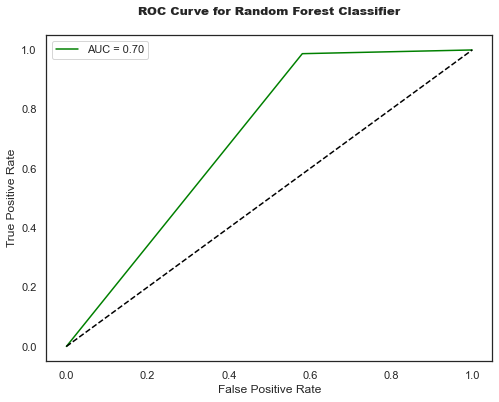

In [134]:
#ROC Curve and Area Under the Curve (AUC) for Decision Tree
y_pred_proba =grid_search.best_estimator_.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=["y_actual"])])
df_actual_predicted.index = y_test.index


fpr, tpr, thresholds = roc_curve(df_actual_predicted["y_actual"], y_pred_grid)
auc = roc_auc_score(df_actual_predicted["y_actual"], y_pred_grid)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest Classifier",pad=20,fontweight="black")
plt.legend()
plt.show()

# Saving the best Model

In [135]:
joblib.dump(grid_search.best_estimator_,'Loan Prediction Final Status.obj')

['Loan Prediction Final Status.obj']

,Y Test,Pred
350,1,1
377,1,1
163,1,1
609,1,1
132,1,1
...,...,...
231,1,1
312,1,1
248,1,1
11,1,1


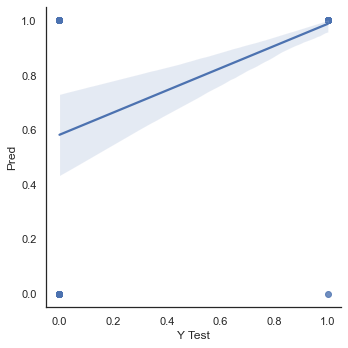

In [136]:
# Comparing the Actual price and predicted price
cmp_data = pd.DataFrame({'Y Test':y_test , 'Pred':y_pred_grid},columns=['Y Test','Pred'])
#cmp_data = pd.DataFrame({'Y Test':np.array(y_test) , 'Pred':np.array(y_pred_grid)},index= range(len(y_test)))
sns.lmplot(x='Y Test',y='Pred',data=cmp_data,palette='rainbow')
cmp_data